In [45]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import norm, pinv
from scipy import fft

def relu(x):
    return x * (x > 0)
def soft_threshold(x, t):
    return np.sign(x) * relu(np.abs(x) - t)
def ista(A, b, l=1, maxit=50):
    M, N = A.shape
    #x = np.zeros([N, 1])
    # initialize with pseudo-inverse solution
    x = pinv(A) @ b
    L = norm(A) ** 2
    AHA = A.conj().T @ A
    AH = A.conj().T
    for _ in range(maxit):
        x = soft_threshold(x - (1/L * AHA @ x) + (1/L * AH @ b) , l / L)
    return x

In [74]:
''' ISTA on Nested Array '''
M = 50
N = 1000
sig = 0.1
N1 = M // 2
N2 = M - N1

inner = np.arange(N1)
outer = np.arange(1, N2+1)*(N1 + 1) - 1

uniform = np.arange(M).reshape(-1,1)
nested = np.concatenate([inner, outer]).reshape(-1, 1)

fgrid = fft.fftfreq(N).reshape(-1, 1)
c = [1, 1]
th_ind = [10, 1000-10]
th = fgrid[th_ind]


A = lambda x : np.exp(1j* 2*np.pi * x @ fgrid.T)
A_u = A(uniform)
A_n = A(nested)

x = np.zeros(N)
x[th_ind] = c

# Build complex noise
n = np.zeros(M).astype(complex)
n.real = sig * np.random.randn(M)
n.imag = sig * np.random.randn(M)

y_u = A_u @ x + n
y_n = A_n @ x + n

In [75]:
''' ULA ISTA '''
l = 50
maxit = 600
S_u = np.abs(ista(A_u, y_u, l, maxit))

In [76]:
''' Nested ISTA '''
l = 50
maxit = 600
S_n = np.abs(ista(A_n, y_n, l, maxit))

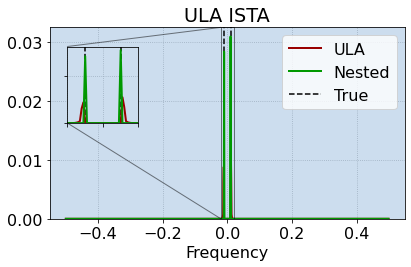

In [88]:
# Plot ULA
zoom_space = 0.01
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(fft.fftshift(fgrid), fft.fftshift(S_u), linewidth=2, color="#990000", label='ULA')
ax.plot(fft.fftshift(fgrid), fft.fftshift(S_n), linewidth=2, color='#009900', label='Nested')
y1, y2 = ax.get_ylim()
ax.vlines(th, linestyle='--', ymin=0, ymax=y2, color='k', label='True')
ax.set_ylim(0, y2)
ax.set_xlabel('Frequency')
ax.set_title('ULA ISTA')
ax.grid(color='#99AABB', linestyle=':')
ax.set_facecolor('#CCDDEE')

# Zoomed plot
axins = ax.inset_axes([0.05, 0.5, 0.2, 0.4])
axins.plot(fft.fftshift(fgrid), fft.fftshift(S_u), linewidth=2, color='#990000', label='ULA')
axins.plot(fft.fftshift(fgrid), fft.fftshift(S_n), linewidth=2, color='#009900', label='Nested')
y1, y2 = ax.get_ylim()
axins.vlines(th, linestyle='--', ymin=y1, ymax=y2, color='k', label='True')
x1, x2 = th.min()-zoom_space, th.max()+zoom_space
axins.set_xlim(x1, x2)
axins.set_ylim(0, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.grid(color='#99AABB', linestyle=':')
axins.set_facecolor('#CCDDEE')

ax.indicate_inset_zoom(axins, edgecolor="k")
ax.legend()
plt.tight_layout()
plt.show()